In [209]:
import matplotlib.pyplot as plt

In [210]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [211]:
lm = LinearRegression()

In [212]:
N= 7
X = np.array(range(N))
X.shape

(7,)

In [213]:
Y = np.multiply(X,2.0) + np.multiply(np.random.random(N),0) + 4
print(Y)

[ 4.  6.  8. 10. 12. 14. 16.]


In [214]:
X1 = X.reshape(X.shape[0],1)
print(X)
print(X1)
lm.fit(X1,Y)

[0 1 2 3 4 5 6]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [215]:
lm.intercept_

4.0

In [216]:
lm.coef_

array([2.])

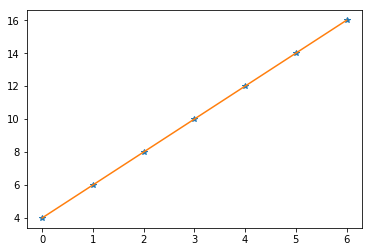

In [217]:
plt.plot(X,Y, "*")
plt.plot(X, np.multiply(X,lm.coef_)+lm.intercept_,)

$\hat{Y} = X W + B $

$\hat{y_i} = \sum_{j=1}^{m} w_i x_i + b $

$Loss(w_1,w_2,...,w_m,b) = \sum_{i=1}^{N} (y_i - \hat{y_i})^2$

In [286]:
def linearFunc(x,w,b):
    return  np.dot(x,w)+b

In [287]:
linearFunc(X,2,4)

array([[ 4,  6],
       [ 8, 10],
       [12, 14],
       [16, 18],
       [20, 22],
       [24, 26]])

In [288]:
def loss(Y_est, X, w, b):
    return np.sum(np.dot(Y_est-linearFunc(X,w,b) , Y_est-linearFunc(X,w,b)))

In [289]:
loss(Y,X,2,4)

ValueError: operands could not be broadcast together with shapes (6,) (6,2) 

In [290]:
Y1 = linearFunc(X,2,4)
loss(Y1,X,2,4)

ValueError: shapes (6,2) and (6,2) not aligned: 2 (dim 1) != 6 (dim 0)

In [291]:
class MyLR(object):
    def __init__(self):
        self.w = None
        self.b = None
    
    def grad_w(self,x,y):
        return np.dot(np.transpose(x), 2* ( linearFunc(x, self.w, self.b) -y ))

    def grad_b(self,x,y):
        return 2* ( linearFunc(x, self.w, self.b) -y )
        
    def fit(self,X,Y, initialise = True, epochs =200, eta = 0.01):
        if initialise:
            self.w = np.random.random(X.shape[1])*10 -5
            self.b =np.random.random()*10 -5
        
        print("Initial weights")
        print(self.w)
        print(self.b)
        print(self.w.shape)
            
        self.loss = []
        self.weights = []
        self.B = []
        
        for t in range(epochs):
            self.loss.append( np.sum( (Y - linearFunc(X,self.w, self.b))* (Y - linearFunc(X,self.w, self.b))))
            self.weights.append(self.w)
            self.B.append(self.b)
            self.w = self.w - eta * (np.sum(self.grad_w(X,Y)))
            self.b = self.b - eta * (np.sum(self.grad_b(X,Y))) 
        
        print("Final weights")
        print(self.w)
        print(self.b)
        plt.plot(self.loss,"*")
        
    def predict(self,X):
        return linearFunc(X, self.w, self.b)


In [292]:
mlm = MyLR()
mlm.fit(X1,Y)

Initial weights
[-0.72685311]
-3.1763288831215153
(1,)


ValueError: operands could not be broadcast together with shapes (6,) (7,) 

In [293]:
mlm.w

array([-0.72685311])

In [294]:
mlm.b

-3.1763288831215153

In [295]:
X = np.array(range(12)).reshape((6,2))

In [296]:
Y = np.dot(X, np.array([2,4]))

In [297]:
Y

array([ 4, 16, 28, 40, 52, 64])

Initial weights
[0.58554612 1.36804003]
-2.4059076927309233
(2,)
Final weights
[2.78535448 3.56784838]
-2.0786311272853424


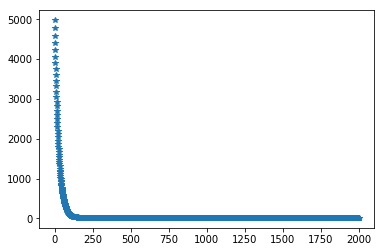

In [298]:
mlm.fit(X,Y, eta = 0.00001, epochs = 2000)

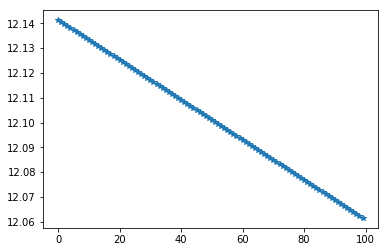

In [299]:
plt.plot(mlm.loss[-100:],"*")

Initial weights
[2.78535448 3.56784838]
-2.0786311272853424
(2,)
Final weights
[2.73495185 3.51744575]
-1.3116683394028887


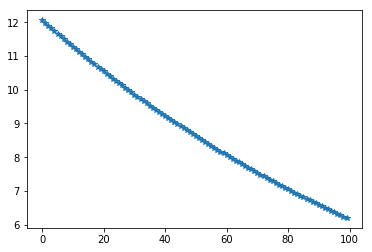

In [300]:
mlm.fit(X,Y, initialise=False, eta = 0.001, epochs = 100)

In [301]:
mlm.predict(X)

array([ 2.20577741, 14.7105726 , 27.21536779, 39.72016298, 52.22495817,
       64.72975337])

In [302]:
Y

array([ 4, 16, 28, 40, 52, 64])